<a href="https://colab.research.google.com/github/sanhiitaa/heart-health-prediction-classifier/blob/main/heart_health_model_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
# data manipulation libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint

# data processing libraries
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# model building libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# metrics libraries
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# setting randomseed
np.random.seed(999)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/datasets/heart_disease_health_indicators_BRFSS2015.csv')
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   Diabetes              253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

Columns Age. Education and Income represent categorical groups, even though the features are numerical. We will not encode these features or convert them into categorical datatype because these numerical values already have an inherent order. Thus, only scaling will be performed on them.

In [ ]:
df.duplicated().sum()

23899

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229781.000000,229781.000000,229781.000000,229781.000000,229781.00000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,...,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000
mean,0.103216,0.454441,0.441760,0.959535,28.68567,0.465661,0.044756,0.325627,0.733355,0.612966,...,0.946075,0.092810,2.601151,3.505373,4.675178,0.185507,0.439231,8.086582,4.980568,5.890383
std,0.304241,0.497921,0.496598,0.197047,6.78636,0.498821,0.206767,0.724623,0.442206,0.487073,...,0.225871,0.290167,1.064685,7.713725,9.046568,0.388709,0.496295,3.093809,0.992895,2.092477
min,0.000000,0.000000,0.000000,0.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.00000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.00000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.00000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


checking for class imbalance:


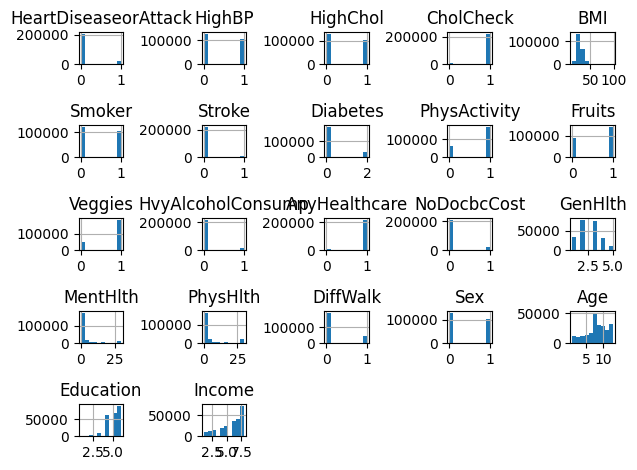

In [ ]:
df.hist();
plt.tight_layout()

In [ ]:
x=df.iloc[:,1:]
y=df.iloc[:,0:1]

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.4)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((137868, 21), (91913, 21), (137868, 1), (91913, 1))

Scale

In [ ]:
coltoscale=['BMI','GenHlth','PhysHlth','Age', 'Income', 'Education']

In [ ]:
for col in coltoscale:
  scale=StandardScaler()
  x_train[col]=scale.fit_transform(x_train[[col]])
  x_test[col]=scale.transform(x_test[[col]])


I performed standardscaling, can try with min-max scaler for columns where range is known.

# Logistic Regression

finding best parameters using gridsearchCV

In [ ]:
# defining hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'max_iter': [500, 1000, 1500],  # Maximum number of iterations
}

# creating logistic regression model
le = LogisticRegression()

# setting up Grid Search with cross-validation
grid_search = GridSearchCV(estimator=le, param_grid=param_grid, cv=5, scoring='accuracy')

# performing Grid Search
grid_search.fit(x_train, y_train.values.ravel())

# get best hyperparameters
best_params = grid_search.best_params_

# get best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best hyperparameters:", best_params)
print("Accuracy:", accuracy)


Best hyperparameters: {'C': 0.001, 'max_iter': 500}
Accuracy: 0.8994810309749437


### **Final linear regression model**

In [ ]:
le=LogisticRegression(max_iter=500, C=0.001)
le.fit(x_train, y_train.values.ravel())

LogisticRegression(C=0.001, max_iter=500)

In [ ]:
pred1=le.predict(x_test)

In [ ]:
# classification report for logistic regression
score= classification_report(y_test, pred1, output_dict=True)
scores=pd.DataFrame()
scores['logistic regression']={'accuracy-score': score['accuracy'],
                               'precision-score': score['weighted avg']['precision'],
                               'recall-score': score['weighted avg']['recall'],
                               'f1-score': score['weighted avg']['f1-score']}

print(scores['logistic regression'])

accuracy-score     0.899394
precision-score    0.872470
recall-score       0.899394
f1-score           0.862184
Name: logistic regression, dtype: float64


In [ ]:
scores


,logistic regression
accuracy-score,0.899394
precision-score,0.872470
recall-score,0.899394
f1-score,0.862184


# Random Forest

In [ ]:
# defining hyperparameters to tune
param_distributions = {'n_estimators': [100, 200, 300, 400, 500],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# creating logistic regression model
rf = RandomForestClassifier()

# setting up Grid Search with cross-validation
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_distributions,
                                   cv=3,
                                   n_jobs=-1,
                                   n_iter=10,
                                   scoring='accuracy')

# performing random Search
random_search.fit(x_train, y_train.values.ravel())

# predicting values
y_pred = random_search.predict(x_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best hyperparameters:", random_search.best_params_)
print("Accuracy:", accuracy)

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None}
Accuracy: 0.9004384581071231


### **Final Random Forest model**

In [ ]:
rf_class=RandomForestClassifier(n_estimators=100,
                                max_depth=None,
                                min_samples_split=10,
                                min_samples_leaf=4)

rf_class.fit(x_train, y_train.values.ravel())

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10)

In [ ]:
pred2=rf_class.predict(x_test)
accuracy = accuracy_score(y_test, pred2)
print("Accuracy:", accuracy)

Accuracy: 0.8986976815031607


In [ ]:
# classification report for random forest
score= classification_report(y_test, pred2, output_dict=True)
scores['random forest']={'accuracy-score': score['accuracy'],
                               'precision-score': score['weighted avg']['precision'],
                               'recall-score': score['weighted avg']['recall'],
                               'f1-score': score['weighted avg']['f1-score']}

print(scores['random forest'])

accuracy-score     0.898698
precision-score    0.869045
recall-score       0.898698
f1-score           0.861723
Name: random forest, dtype: float64


In [ ]:
scores

,logistic regression,random forest
accuracy-score,0.899394,0.898698
precision-score,0.872470,0.869045
recall-score,0.899394,0.898698
f1-score,0.862184,0.861723


# K-Nearest Neighbors

In [ ]:
# defining hyperparameters to tune
param_distributions = {'n_neighbors': randint(1,20),
                       'weights': ['uniform', 'distance'],
                       'p': [1,2]}

# creating logistic regression model
knn = KNeighborsClassifier()

# setting up Grid Search with cross-validation
random_search = RandomizedSearchCV(estimator=knn,
                                   param_distributions=param_distributions,
                                   cv=3,
                                   n_jobs=-1,
                                   n_iter=10,
                                   scoring='accuracy')

# performing random Search
random_search.fit(x_train, y_train.values.ravel())

# predicting values
y_pred = random_search.predict(x_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best hyperparameters:", random_search.best_params_)
print("Accuracy:", accuracy)

Best hyperparameters: {'n_neighbors': 13, 'p': 2, 'weights': 'uniform'}
Accuracy: 0.8958797993754964


### **Final KNN model**

In [ ]:
knn=KNeighborsClassifier(n_neighbors=13,
                         weights='uniform',
                         p=2)

knn.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=13)

In [ ]:
pred3= knn.predict(x_test)
accuracy = accuracy_score(y_test, pred3)
print("Accuracy:", accuracy)

Accuracy: 0.8958797993754964


In [ ]:
# classification report for K Nearest Neighbors
score= classification_report(y_test, pred3, output_dict=True)
scores['k nearest neighbors']={'accuracy-score': score['accuracy'],
                               'precision-score': score['weighted avg']['precision'],
                               'recall-score': score['weighted avg']['recall'],
                               'f1-score': score['weighted avg']['f1-score']}

print(scores['k nearest neighbors'])

accuracy-score     0.895880
precision-score    0.858465
recall-score       0.895880
f1-score           0.860408
Name: k nearest neighbors, dtype: float64


In [ ]:
scores

,logistic regression,random forest,k nearest neighbors
accuracy-score,0.899394,0.898698,0.895880
precision-score,0.872470,0.869045,0.858465
recall-score,0.899394,0.898698,0.895880
f1-score,0.862184,0.861723,0.860408


# **Artificial Neural Network**

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout

# installing keras-tuner
!pip install -q keras-tuner

# importing keras_tuner
import keras_tuner as kt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.1 MB/s eta 0:00:00


In [ ]:
def model_builder(hp):
  model=Sequential()

  counter=0

  for i in range(hp.Int('num_layers', min_value=1, max_value=5)):
    if counter==0:
      model.add(
          Dense(units= hp.Int('unit: '+str(i), min_value=8, max_value=512, step=8),
                activation=hp.Choice('activation: '+str(i), values=['relu', 'tanh', 'sigmoid']),
                input_dim=21)

      )
      model.add(Dropout(hp.Float('dropout: '+str(i), min_value=0.0, max_value=0.5, step=0.1)))
      counter+=1

    else:
      model.add(
          Dense(units= hp.Int('unit: '+str(i), min_value=8, max_value=512, step=8),
                activation= hp.Choice( 'activation: '+str(i), values=['relu', 'tanh', 'sigmoid']))
      )
      model.add(Dropout(hp.Float('dropout: '+str(i), min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer= hp.Choice('optimizer: ', values=['adam', 'rmsprop','sgd', 'adadelta', 'nadam']),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
tuner=kt.RandomSearch(model_builder,
                      objective='val_accuracy',
                      max_trials=10,
                      directory='mydir',
                      project_name='tuner-with-dropout')

Reloading Tuner from mydir/tuner-with-dropout/tuner0.json


In [ ]:
tuner.search(x_train, y_train.values.ravel(), epochs=5, validation_data=(x_test, y_test.values.ravel()))

In [ ]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 1,
 'unit: 0': 408,
 'activation: 0': 'relu',
 'dropout: 0': 0.4,
 'optimizer: ': 'adam'}

In [ ]:
best_model=tuner.get_best_models(num_models=1)[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 408)               8976      
                                                                 
 dropout (Dropout)           (None, 408)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 409       
                                                                 
Total params: 9385 (36.66 KB)
Trainable params: 9385 (36.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model= Sequential()

model.add(Dense(408, activation='relu', input_dim=21))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 408)               8976      
                                                                 
 dropout_1 (Dropout)         (None, 408)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 409       
                                                                 
Total params: 9385 (36.66 KB)
Trainable params: 9385 (36.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history= model.fit(x_train, y_train.values.ravel(), epochs=100, validation_data=(x_test, y_test.values.ravel()))

Epoch 1/100
4309/4309 [==============================] - 15s 3ms/step - loss: 0.2707 - accuracy: 0.8969 - val_loss: 0.2597 - val_accuracy: 0.8987
Epoch 2/100
4309/4309 [==============================] - 14s 3ms/step - loss: 0.2630 - accuracy: 0.8982 - val_loss: 0.2583 - val_accuracy: 0.8983
Epoch 3/100
4309/4309 [==============================] - 15s 3ms/step - loss: 0.2615 - accuracy: 0.8982 - val_loss: 0.2569 - val_accuracy: 0.8990
Epoch 4/100
4309/4309 [==============================] - 16s 4ms/step - loss: 0.2605 - accuracy: 0.8986 - val_loss: 0.2565 - val_accuracy: 0.8995
Epoch 5/100
4309/4309 [==============================] - 19s 4ms/step - loss: 0.2600 - accuracy: 0.8983 - val_loss: 0.2583 - val_accuracy: 0.8995
Epoch 6/100
4309/4309 [==============================] - 15s 4ms/step - loss: 0.2599 - accuracy: 0.8989 - val_loss: 0.2570 - val_accuracy: 0.8994
Epoch 7/100
4309/4309 [==============================] - 18s 4ms/step - loss: 0.2597 - accuracy: 0.8986 - val_loss: 0.2580 -

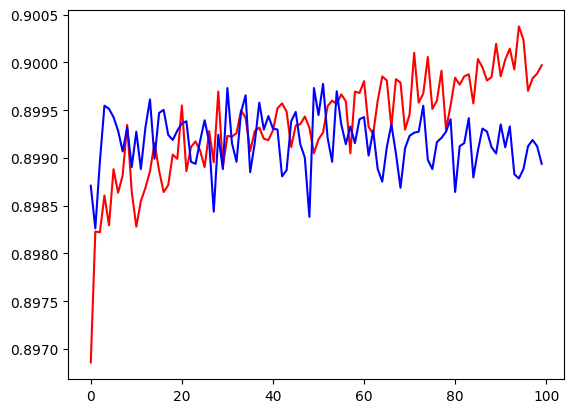

In [ ]:
plt.plot(history.history['accuracy'], color='red', label='train-accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='test-accuracy')

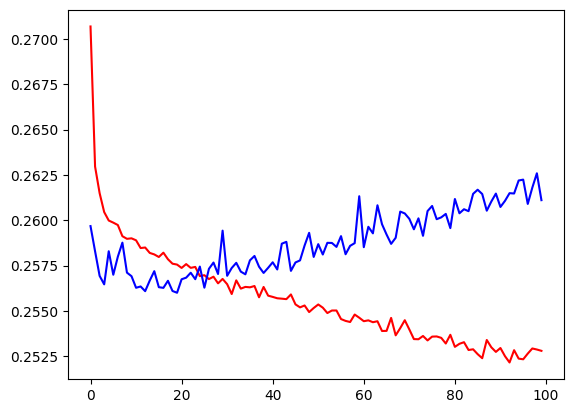

In [ ]:
plt.plot(history.history['loss'], color='red', label='train-loss')
plt.plot(history.history['val_loss'], color='blue', label='test-loss')

In [ ]:
pred4= model.predict(x_test)
pred4_binary = (pred4 > 0.5).astype(int)
accuracy = accuracy_score(y_test, pred4_binary)
print("Accuracy:", accuracy)

2873/2873 [==============================] - 9s 3ms/step
Accuracy: 0.8989370382862054


In [ ]:
# classification report for K Nearest Neighbors
score= classification_report(y_test, pred4_binary, output_dict=True)
scores['ANN']={'accuracy-score': score['accuracy'],
                               'precision-score': score['weighted avg']['precision'],
                               'recall-score': score['weighted avg']['recall'],
                               'f1-score': score['weighted avg']['f1-score']}

print(scores['ANN'])

accuracy-score     0.898937
precision-score    0.869656
recall-score       0.898937
f1-score           0.867069
Name: ANN, dtype: float64


In [ ]:
scores

,logistic regression,random forest,k nearest neighbors,ANN
accuracy-score,0.899394,0.898698,0.895880,0.898937
precision-score,0.872470,0.869045,0.858465,0.869656
recall-score,0.899394,0.898698,0.895880,0.898937
f1-score,0.862184,0.861723,0.860408,0.867069


# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm= SVC(kernel='linear', C=1.0)

svm.fit(x_train, y_train.values.ravel())

y_pred = svm.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load your dataset (assuming it's in a CSV file)
# Replace 'your_dataset.csv' with your actual dataset filename
data = pd.read_csv('your_dataset.csv')

# Assuming 'X' contains your features (numerical and label encoded) and 'y' contains your labels
# Replace 'feature_columns' and 'label_column' with actual column names
X = data[feature_columns]
y = data[label_column]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)  # You can choose different kernels and C values based on your data

# Train the SVM classifier
svm_classifier.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
